### Student Performance Prediction

Student Performance Prediction App predicts grade of a student by analysing academic and non-academic information of a concerned student

 1. <b>train.csv</b> - Load data to train in this csv file
 2. <b>pred.csv</b>  - Load data to run prediction in this csv file
 3. <b>output.csv</b>- Writes predicted output in this file in the column <b>y_pred</b>

 4. <b>TARGET_VARIABLE</b> - Set this variable to name of the feature/column to be predicted
 5. <b>NUMERICAL_FEATURES</b> - List all feature/column that are of numeric type

<b>Note:</b> Update variables under <b>Variables</b> section to configure inputs if required before running the notebook.

To run notebook cell by cell, click on a cell and click <b>Run</b> button below the <b>Menu</b> bar. Or to run all cells, select <b>Cell --> Run All</b> from Menu bar.

#### Variables

In [1]:
TARGET_VARIABLE='G3' #variable to be predicted
NUMERICAL_FEATURES=["age", "G1", "G2"] #features to be interpreted as numeric

Default values

In [2]:
INPUT_TRAIN_FILE="train.csv"
INPUT_TEST_FILE="pred.csv"
OUTPUT_PRED_FILE="output.csv"
OUTPUT_PRED="y_pred"
MODEL_FILE="model"

#### Import library to read file and load to dataframe

In [3]:
import pandas as pd

#### Import libraries for machine learning

Import regression module

In [4]:
from pycaret.regression import *

####  Description of example data loaded
Attributes for train.csv and test.csv (Portuguese language course) datasets:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related to the course subject, Portuguese:

31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

Loading input files into dataframe

In [6]:
df_train=pd.read_csv(INPUT_TRAIN_FILE)
df_test=pd.read_csv(INPUT_TEST_FILE)

In [7]:
#intialize the setup
exp_reg = setup(df_train, target = TARGET_VARIABLE, numeric_features=NUMERICAL_FEATURES)

,Description,Value
0,session_id,4686
1,Target,G3
2,Original Data,"(649, 33)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,28
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(454, 86)"


In [8]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,0.7526,1.5701,1.2099,0.8472,0.2463,0.0562,0.0050
lasso,Lasso Regression,0.7647,1.6020,1.2234,0.8439,0.2425,0.0579,0.0050
br,Bayesian Ridge,0.7979,1.5841,1.2215,0.8430,0.2366,0.0614,0.0070
rf,Random Forest Regressor,0.8002,1.5519,1.2101,0.8429,0.2341,0.0641,0.1150
lightgbm,Light Gradient Boosting Machine,0.8475,1.6621,1.2432,0.8357,0.2422,0.0675,0.0190
huber,Huber Regressor,0.7818,1.6844,1.2507,0.8357,0.2441,0.0590,0.0230
omp,Orthogonal Matching Pursuit,0.8241,1.6767,1.2590,0.8335,0.2334,0.0642,0.0080
knn,K Neighbors Regressor,0.8776,1.6555,1.2628,0.8306,0.2276,0.0709,0.0080
gbr,Gradient Boosting Regressor,0.8374,1.7130,1.2738,0.8280,0.2423,0.0681,0.0470
ada,AdaBoost Regressor,0.8282,1.7685,1.2893,0.8261,0.2436,0.0653,0.0430


In [9]:
tuned_model = tune_model(estimator=best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7468,0.8951,0.9461,0.8661,0.0805,0.0648
1,0.7933,1.9624,1.4009,0.7484,0.3255,0.0521
2,0.7468,1.7600,1.3266,0.8499,0.3699,0.0504
3,0.7002,0.7637,0.8739,0.8768,0.0764,0.0620
4,0.5866,0.5252,0.7247,0.9376,0.0596,0.0490
5,0.7302,0.9187,0.9585,0.9054,0.0816,0.0668
6,0.7798,1.8536,1.3615,0.8552,0.3528,0.0505
7,0.9825,3.2452,1.8014,0.7536,0.4129,0.0719
8,0.7448,1.4756,1.2148,0.8927,0.3165,0.0511
9,0.7921,1.7682,1.3298,0.8226,0.3228,0.0584


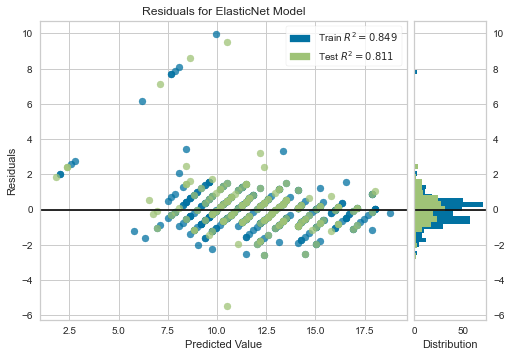

In [10]:
plot_model(best_model)

In [11]:
# evaluate a model 
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [12]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,0.8334,2.0607,1.4355,0.8111,0.3020,0.1105


,age,absences,G1,G2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_0,...,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,G3,Label
0,17.0,8.0,11.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11,10.698100
1,17.0,2.0,10.0,11.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12,11.268229
2,17.0,2.0,10.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13,12.779773
3,18.0,1.0,16.0,16.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16,16.160954
4,16.0,5.0,10.0,11.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11,11.268229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,16.0,6.0,7.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,7.688207
191,15.0,0.0,13.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15,14.092477
192,16.0,16.0,10.0,11.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12,11.268229
193,15.0,2.0,12.0,13.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,13.151060


In [13]:
final_model = finalize_model(best_model)

In [14]:
save_model(final_model, MODEL_FILE)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['age', 'G1', 'G2'],
                                       target='G3', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
 

In [15]:
loaded_model = load_model(MODEL_FILE)

Transformation Pipeline and Model Successfully Loaded


In [16]:
y_pred=loaded_model.predict(df_test)

In [17]:
df_test[OUTPUT_PRED]=y_pred
df_test.to_csv(OUTPUT_PRED_FILE)